In [41]:
import seaborn as sns # visualization
import math as m 
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import warnings
warnings.filterwarnings('ignore')

In [42]:
app_record = pd.read_csv(r"E:\archive\application_record.csv")
print("Dataset size")
print(cl("Rows {} Columns {}".format(app_record.shape[0], app_record.shape[1]), attrs = ['bold'], color = 'black'))
app_record.head()

Dataset size
Rows 438557 Columns 18


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [43]:
pd.DataFrame(app_record.dtypes).rename(columns = {0:'dtype'})

,dtype
ID,int64
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
NAME_FAMILY_STATUS,object
NAME_HOUSING_TYPE,object


In [44]:
app_record.describe(include = 'all').T.fillna(0)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,438557.0,0,0,0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CODE_GENDER,438557.0,2,F,294440,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_OWN_CAR,438557.0,2,N,275459,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_OWN_REALTY,438557.0,2,Y,304074,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
CNT_CHILDREN,438557.0,0,0,0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,0,0,0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
NAME_INCOME_TYPE,438557.0,5,Working,226104,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
NAME_EDUCATION_TYPE,438557.0,5,Secondary / secondary special,301821,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
NAME_FAMILY_STATUS,438557.0,5,Married,299828,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
NAME_HOUSING_TYPE,438557.0,6,House / apartment,393831,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0


In [45]:
pd.DataFrame(app_record.info()).rename(columns = {0:'Index',1:'dtype',2:'See Null',3:'Dtype'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

""


In [46]:
credit_record = pd.read_csv(r"E:\archive\credit_record.csv")
print("Dataset size")
print(cl("Rows {} Columns {}".format(credit_record.shape[0], credit_record.shape[1]), attrs = ['bold'], color = 'black'))
credit_record.head()

Dataset size
Rows 1048575 Columns 3


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


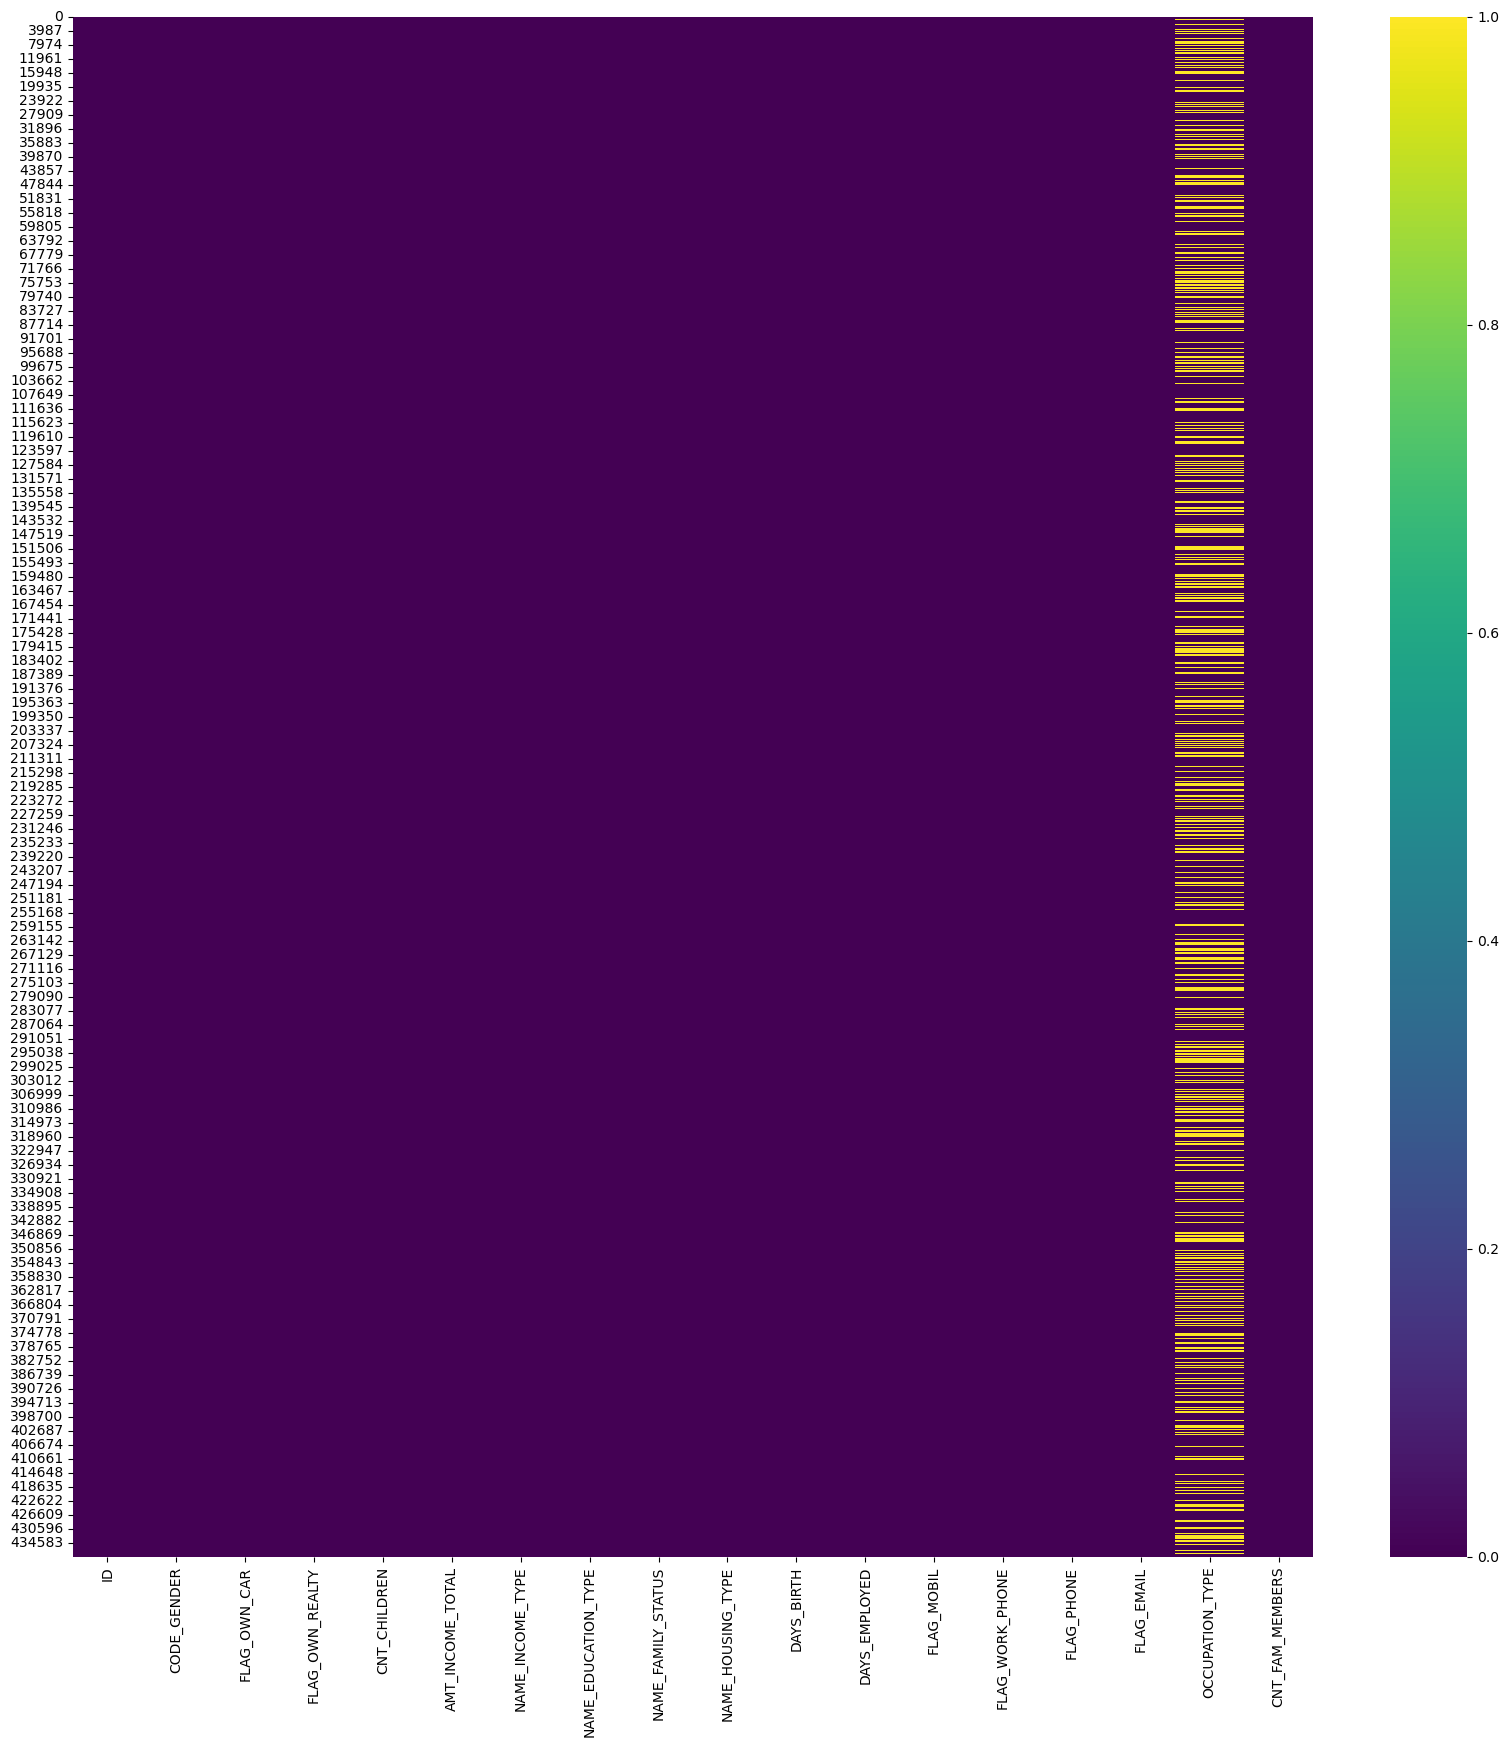

In [47]:
plt.figure(figsize=(20,20))
sns.heatmap(app_record.isnull(),cmap = 'viridis')
plt.show()

In [48]:
pd.DataFrame(app_record.isna().sum()).rename(columns = {0:'See Null Values'})

,See Null Values
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [49]:
app_record.duplicated().sum()

0

In [50]:
from sklearn.impute import SimpleImputer
mode = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
app_record['OCCUPATION_TYPE'] = mode.fit_transform(app_record[['OCCUPATION_TYPE']])

In [51]:
pd.DataFrame(app_record.isna().sum()).rename(columns = {0:'See Null Values'})

,See Null Values
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [52]:
pd.DataFrame(credit_record.dtypes).rename(columns = {0:'dtype'})

,dtype
ID,int64
MONTHS_BALANCE,int64
STATUS,object


In [53]:
credit_record.describe(include = 'all').T.fillna(0)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1048575.0,0,0,0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,0,0,0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0
STATUS,1048575.0,8,C,442031,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0


In [54]:
pd.DataFrame(credit_record.info()).rename(columns = {0:'Index',1:'dtype',2:'See Null',3:'Dtype'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


""


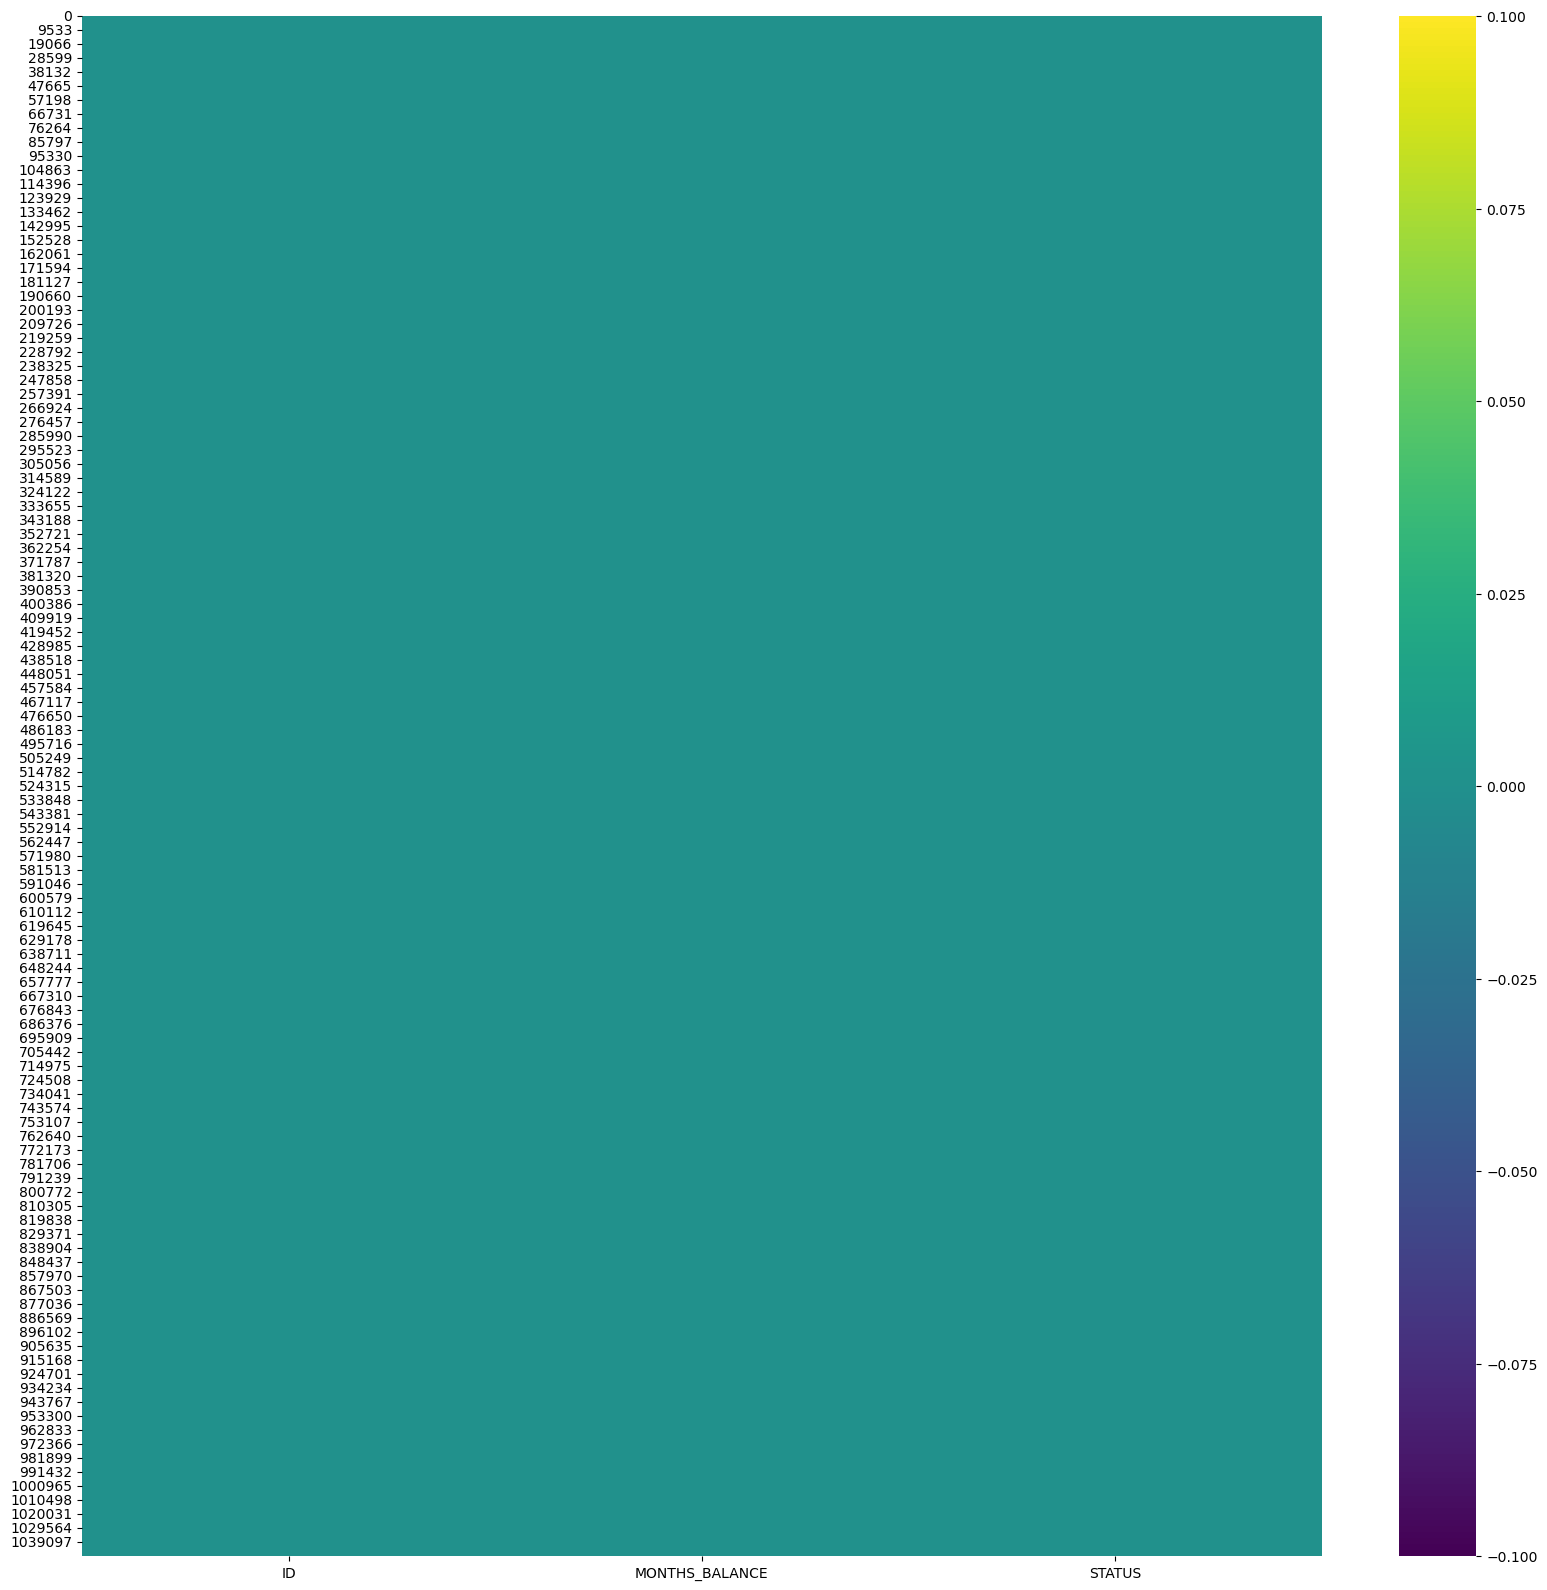

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(credit_record.isnull(),cmap = 'viridis')
plt.show()

In [56]:
df = app_record.merge(credit_record, on=['ID'],how='inner')
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-4,C


In [57]:
len(df)

777715

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [59]:
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

,dtype
ID,int64
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
NAME_FAMILY_STATUS,object
NAME_HOUSING_TYPE,object


In [60]:
df.describe(include = 'all').T.fillna(0)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,777715.0,0,0,0,5.078743e+06,41804.424817,5008804.0,5044568.5,5069530.0,5115551.0,5150487.0
CODE_GENDER,777715.0,2,F,518851,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_OWN_CAR,777715.0,2,N,473355,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
FLAG_OWN_REALTY,777715.0,2,Y,512948,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
CNT_CHILDREN,777715.0,0,0,0,4.280823e-01,0.745755,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,777715.0,0,0,0,1.885348e+05,101622.450076,27000.0,121500.0,162000.0,225000.0,1575000.0
NAME_INCOME_TYPE,777715.0,5,Working,400164,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
NAME_EDUCATION_TYPE,777715.0,5,Secondary / secondary special,524261,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
NAME_FAMILY_STATUS,777715.0,5,Married,546619,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
NAME_HOUSING_TYPE,777715.0,6,House / apartment,697151,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0


In [61]:
pd.DataFrame(df.info()).rename(columns = {0:'Index',1:'dtype',2:'See Null',3:'Dtype'})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

""


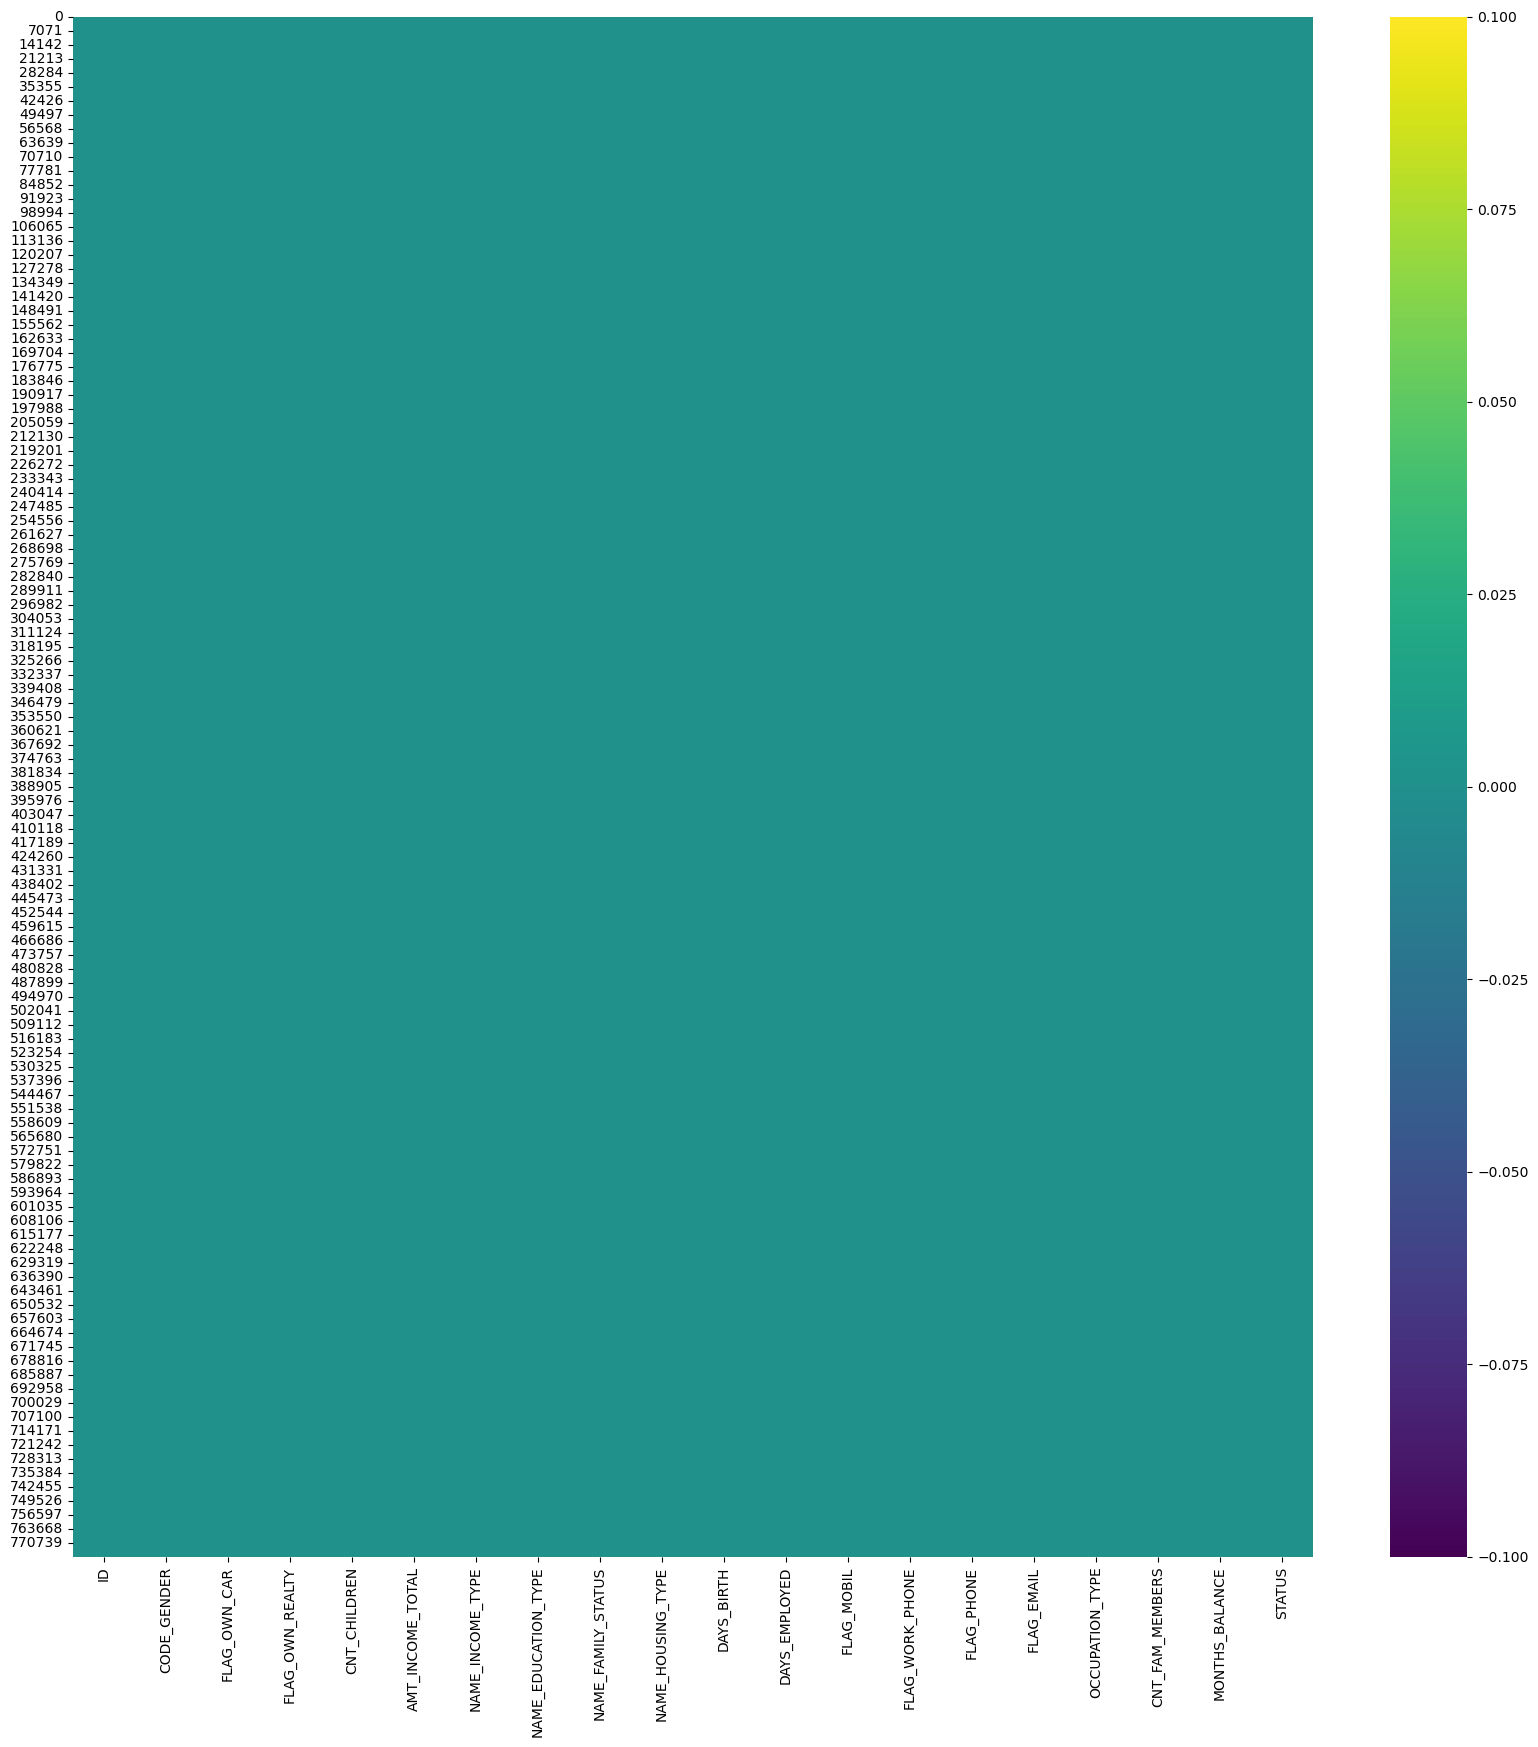

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(),cmap = 'viridis')
plt.show()

In [63]:
pd.DataFrame(df.isna().sum()).rename(columns = {0:'See Null Values'})

,See Null Values
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [64]:
df.duplicated().sum()

0

In [65]:
max = pd.DataFrame(df.max()).rename(columns = {0:'Maxmimum'})
max

,Maxmimum
ID,5150487
CODE_GENDER,M
FLAG_OWN_CAR,Y
FLAG_OWN_REALTY,Y
CNT_CHILDREN,19
AMT_INCOME_TOTAL,1575000.0
NAME_INCOME_TYPE,Working
NAME_EDUCATION_TYPE,Secondary / secondary special
NAME_FAMILY_STATUS,Widow
NAME_HOUSING_TYPE,With parents


In [66]:
min = pd.DataFrame(df.min()).rename(columns = {0:'Minimum'})
min

,Minimum
ID,5008804
CODE_GENDER,F
FLAG_OWN_CAR,N
FLAG_OWN_REALTY,N
CNT_CHILDREN,0
AMT_INCOME_TOTAL,27000.0
NAME_INCOME_TYPE,Commercial associate
NAME_EDUCATION_TYPE,Academic degree
NAME_FAMILY_STATUS,Civil marriage
NAME_HOUSING_TYPE,Co-op apartment


In [67]:
for i,row in min.iterrows():
    try:
        above_35 = df[df[i] > row[0]]
        print(cl("column is: {} Rows: {} ".format(i,above_35.shape[0]), attrs = ['bold'], color = 'black'))
    except:
        pass


column is: ID Rows: 777699 
column is: CODE_GENDER Rows: 258864 
column is: FLAG_OWN_CAR Rows: 304360 
column is: FLAG_OWN_REALTY Rows: 512948 
column is: CNT_CHILDREN Rows: 237076 
column is: AMT_INCOME_TOTAL Rows: 777637 
column is: NAME_INCOME_TYPE Rows: 594330 
column is: NAME_EDUCATION_TYPE Rows: 776878 
column is: NAME_FAMILY_STATUS Rows: 717373 
column is: NAME_HOUSING_TYPE Rows: 774060 
column is: DAYS_BIRTH Rows: 777631 
column is: DAYS_EMPLOYED Rows: 777698 
column is: FLAG_MOBIL Rows: 0 
column is: FLAG_WORK_PHONE Rows: 180288 
column is: FLAG_PHONE Rows: 234065 
column is: FLAG_EMAIL Rows: 71297 
column is: OCCUPATION_TYPE Rows: 750492 
column is: CNT_FAM_MEMBERS Rows: 636238 
column is: MONTHS_BALANCE Rows: 777394 
column is: STATUS Rows: 487061 


In [68]:
for (i, row1), (j, row2) in zip(min.iterrows(), max.iterrows()):
    try:
        class_min_max = df[df[i].isin([float(row1[0]),float(row2[0])])]
        print("count of '{}' is in min and max is : {}".format(i,class_min_max.shape[0]))
        print("Rows :{}".format(class_min_max.shape[0]))
    except:
        pass

count of 'ID' is in min and max is : 46
Rows :46
count of 'CNT_CHILDREN' is in min and max is : 540645
Rows :540645
count of 'AMT_INCOME_TOTAL' is in min and max is : 228
Rows :228
count of 'DAYS_BIRTH' is in min and max is : 85
Rows :85
count of 'DAYS_EMPLOYED' is in min and max is : 127989
Rows :127989
count of 'FLAG_MOBIL' is in min and max is : 777715
Rows :777715
count of 'FLAG_WORK_PHONE' is in min and max is : 777715
Rows :777715
count of 'FLAG_PHONE' is in min and max is : 777715
Rows :777715
count of 'FLAG_EMAIL' is in min and max is : 777715
Rows :777715
count of 'CNT_FAM_MEMBERS' is in min and max is : 141483
Rows :141483
count of 'MONTHS_BALANCE' is in min and max is : 24993
Rows :24993


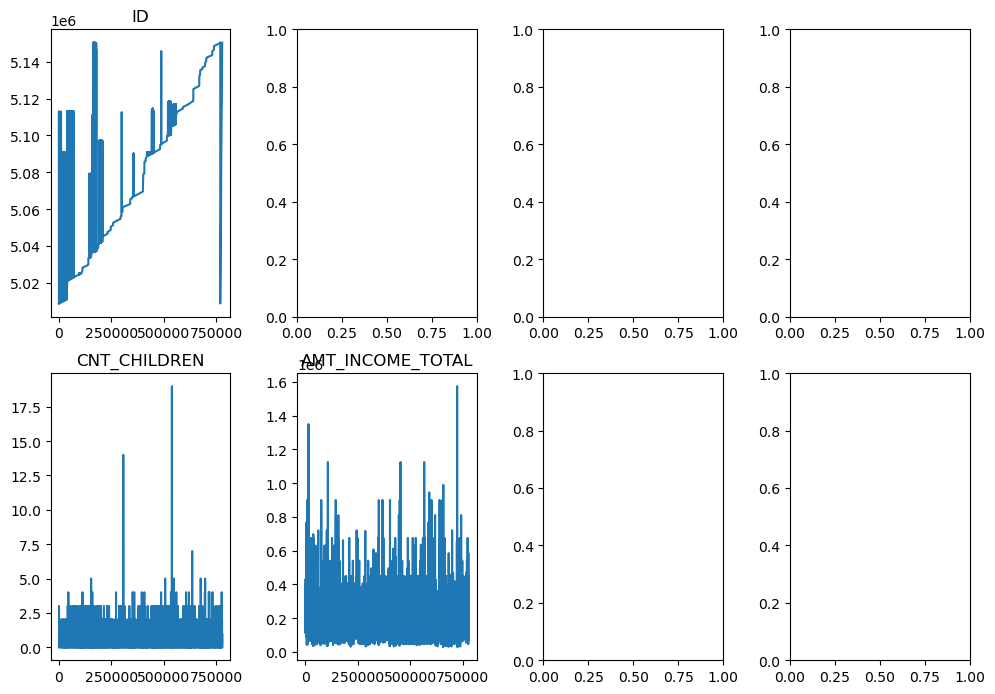

In [69]:
feature_list = df.columns
fig = plt.figure(figsize = (10,7))

for i in range(len(feature_list)):
    try:
        col = feature_list[i]
        sub = fig.add_subplot(2,4,i+1)
        chart = df[col].plot()
        chart.set_title(col)
    except:
        pass
plt.tight_layout(pad = 0.9)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [71]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Laborers,2.0,-4,C


In [72]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(df[col].values)) 
        df[col] = lbl.transform(list(df[col].values))
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,0,6
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-1,6
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-2,6
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-3,6
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,8,2.0,-4,6


In [73]:
pd.DataFrame(df.apply(lambda x: x.max() - x.min())).rename(columns = {0:'Max - Min'})

,Max - Min
ID,141683.0
CODE_GENDER,1.0
FLAG_OWN_CAR,1.0
FLAG_OWN_REALTY,1.0
CNT_CHILDREN,19.0
AMT_INCOME_TOTAL,1548000.0
NAME_INCOME_TYPE,4.0
NAME_EDUCATION_TYPE,4.0
NAME_FAMILY_STATUS,4.0
NAME_HOUSING_TYPE,5.0


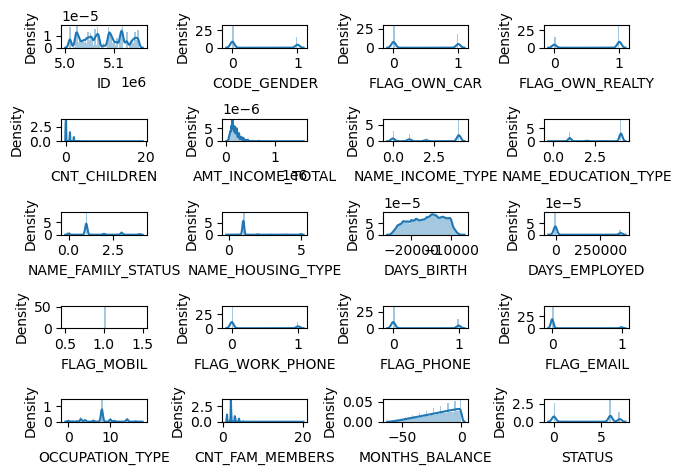

In [74]:
i = 1
for col in df.columns:
    if df[col].dtypes == 'object':
        continue
    plt.subplot(5,4,i)
    sns.distplot(df[col])
    i += 1
plt.tight_layout(pad = 0.9)
plt.show()

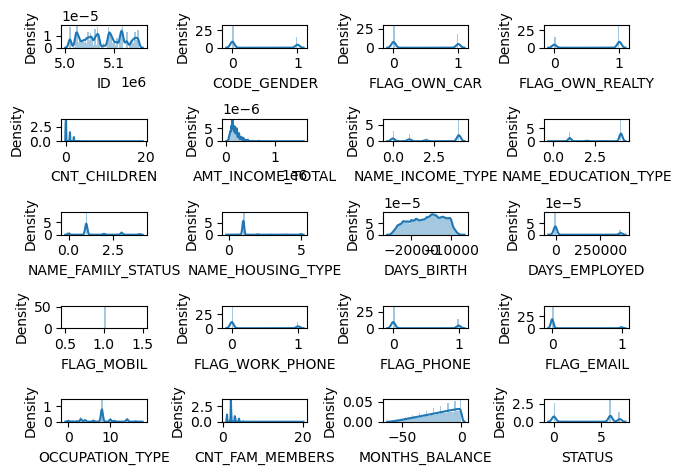

In [75]:
i = 1
for col in df.columns:
    if df[col].dtypes == 'object':
        continue
    plt.subplot(5,4,i)
    sns.distplot(df[col])
    i += 1
plt.tight_layout(pad = 0.9)
plt.show()

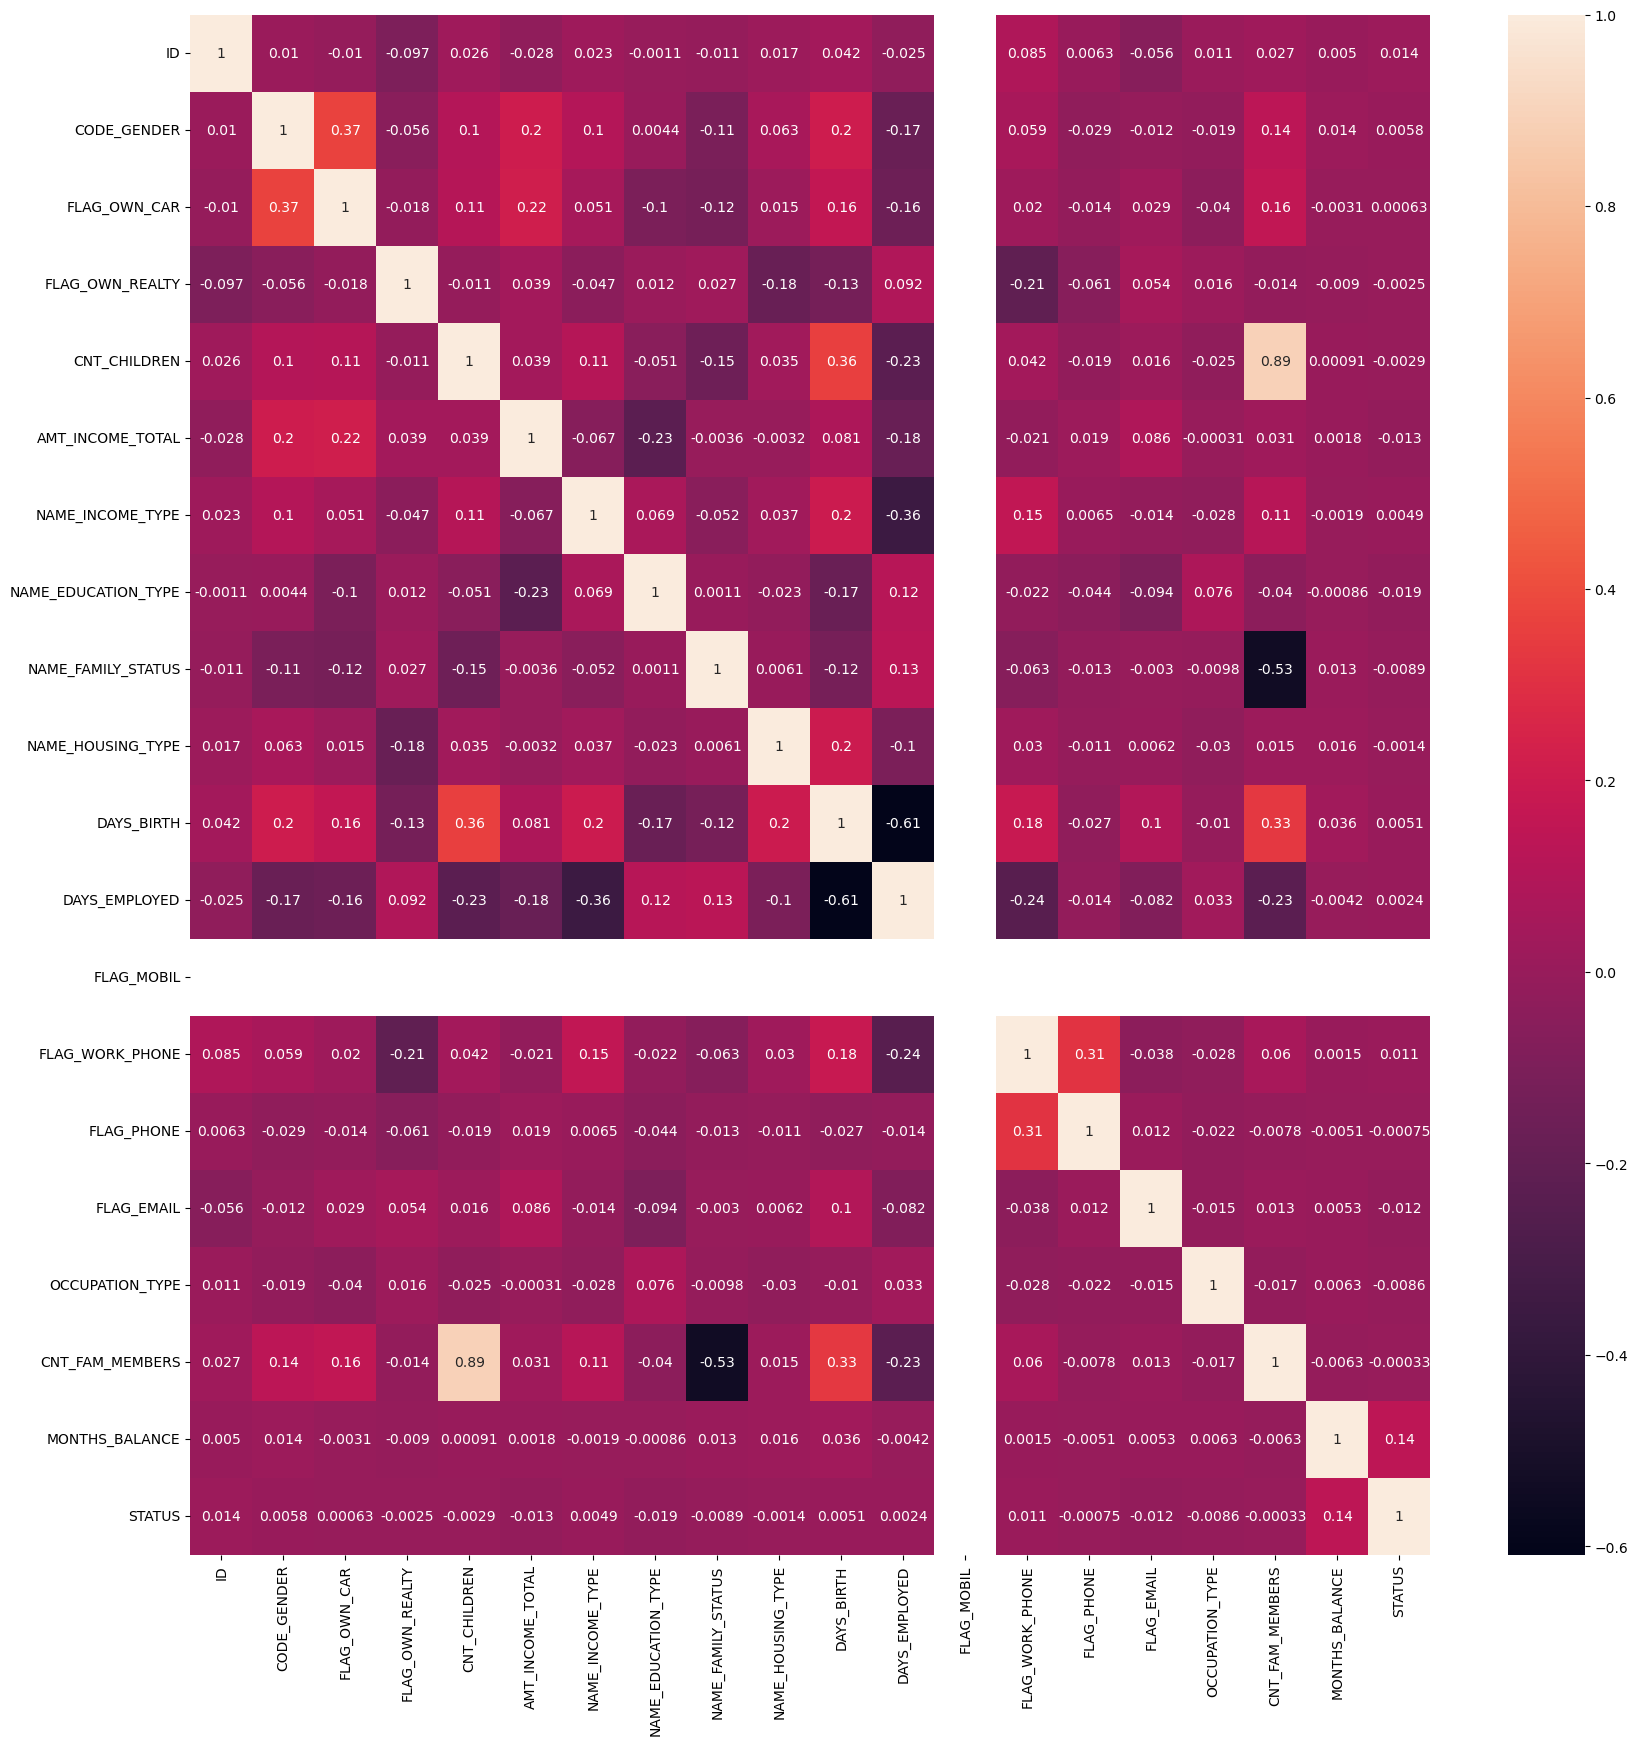

In [76]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int32  
 2   FLAG_OWN_CAR         777715 non-null  int32  
 3   FLAG_OWN_REALTY      777715 non-null  int32  
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  int32  
 7   NAME_EDUCATION_TYPE  777715 non-null  int32  
 8   NAME_FAMILY_STATUS   777715 non-null  int32  
 9   NAME_HOUSING_TYPE    777715 non-null  int32  
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [78]:
df['FLAG_MOBIL'].value_counts()

1    777715
Name: FLAG_MOBIL, dtype: int64

In [79]:
df.drop('FLAG_MOBIL',axis = 1,inplace = True)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,8,2.0,0,6
1,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,8,2.0,-1,6
2,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,8,2.0,-2,6
3,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,8,2.0,-3,6
4,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,8,2.0,-4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,0,0,0,8,1.0,-9,0
777711,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,0,0,0,8,1.0,-10,2
777712,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,0,0,0,8,1.0,-11,1
777713,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,0,0,0,8,1.0,-12,0


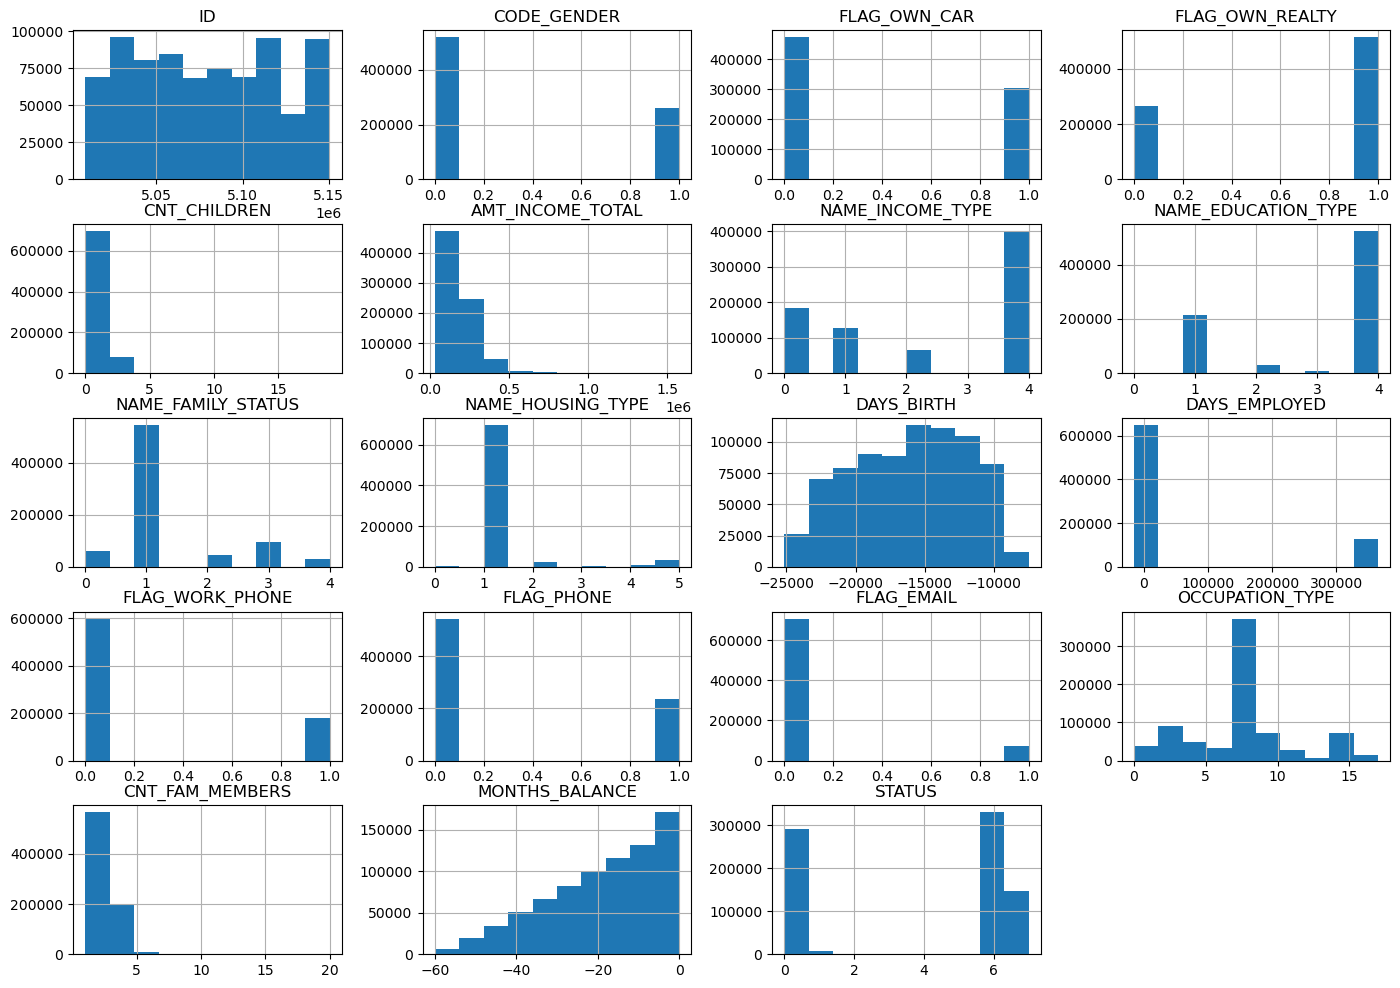

In [80]:
_ = df.hist(figsize=(17, 12))

In [82]:
def z_score(df,column):
    mean = df[column].mean()
    std = df[column].std()
    outliers = []
    for i in range(len(df[column])):
        if df.loc[i,column] > (mean + 3*std) or df.loc[i,column] < (mean - 3*std):
            outliers.append(df.loc[i,column])
    print(f'outliers in {column}: ',outliers)
for col in df.columns:
    z_score(df,col)

outliers in ID:  []
outliers in CODE_GENDER:  []
outliers in FLAG_OWN_CAR:  []
outliers in FLAG_OWN_REALTY:  []
outliers in CNT_CHILDREN:  [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [84]:
def handle_outliers(df,column):
    mean = df[column].mean()
    std = df[column].std()
    for i in range(len(df[column])):
        if df.loc[i,column] > (mean + 3*std)  :
            df.loc[i,column] = mean + 3 * std
        elif df.loc[i,column] < (mean - 3*std):
            df.loc[i,column] = (mean - 3*std)
for col in df.columns:
    if col == 'CNT_CHILDREN' and col == 'NAME_HOUSING_TYPE' and col == 'FLAG_EMAIL' and col == 'CNT_FAM_MEMBERS':
        continue
    else:
        handle_outliers(df,col)

In [101]:
num = df.select_dtypes("number")
corr1=[]
for col in num:
    corr = abs(df['STATUS'].corr(df[col]))
    corr1.append(corr)
 
 
corr = pd.Series(corr1, name="corr Scores", index=list(df.columns).remove('STATUS'))
corr = corr.sort_values(ascending=False)
print(corr)
f1 = corr.index[corr <  0.003].tolist()
ind = df.columns.get_loc("STATUS")
f1.append(ind)
x = df.drop(df.iloc[:, f1],axis = 1)
x

18    1.000000
17    0.140139
7     0.019092
0     0.014255
14    0.012077
5     0.011048
12    0.010512
8     0.008906
15    0.008588
1     0.005773
10    0.005070
6     0.004904
3     0.002500
11    0.002361
9     0.001472
4     0.001349
16    0.000751
13    0.000747
2     0.000631
Name: corr Scores, dtype: float64


,ID,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,MONTHS_BALANCE
0,5008804,1,427500.0,4,1,0,-12005,1,0.0,8,0
1,5008804,1,427500.0,4,1,0,-12005,1,0.0,8,-1
2,5008804,1,427500.0,4,1,0,-12005,1,0.0,8,-2
3,5008804,1,427500.0,4,1,0,-12005,1,0.0,8,-3
4,5008804,1,427500.0,4,1,0,-12005,1,0.0,8,-4
...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1,112500.0,4,4,3,-9188,0,0.0,8,-9
777711,5150337,1,112500.0,4,4,3,-9188,0,0.0,8,-10
777712,5150337,1,112500.0,4,4,3,-9188,0,0.0,8,-11
777713,5150337,1,112500.0,4,4,3,-9188,0,0.0,8,-12


In [88]:
len(f1)

8

In [89]:
y = df['STATUS']
y

0         6
1         6
2         6
3         6
4         6
         ..
777710    0
777711    2
777712    1
777713    0
777714    0
Name: STATUS, Length: 777715, dtype: int32

In [102]:
class MinMaxScaler():
    def __init__(self, feature_range=(0, 1)):
        self.low_, self.high_ = feature_range

    def fit(self, X):
        self.min_ = X.min(axis=0)
        self.max_ = X.max(axis=0)
        return self

    def transform(self, X):
        X_std = (X - self.min_) / (self.max_ - self.min_)
        return X_std * (self.high_ - self.low_) + self.low_

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [103]:
scaler = MinMaxScaler()
for col in x.columns:
    if col == 'ID':
        continue
    else:
        scaler.fit(x[col])
        x[col] = scaler.transform(x[col])
x

,ID,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,MONTHS_BALANCE
0,5008804,1.0,0.858701,1.0,0.25,0.00,0.744324,1.0,0.0,0.470588,1.000000
1,5008804,1.0,0.858701,1.0,0.25,0.00,0.744324,1.0,0.0,0.470588,0.983333
2,5008804,1.0,0.858701,1.0,0.25,0.00,0.744324,1.0,0.0,0.470588,0.966667
3,5008804,1.0,0.858701,1.0,0.25,0.00,0.744324,1.0,0.0,0.470588,0.950000
4,5008804,1.0,0.858701,1.0,0.25,0.00,0.744324,1.0,0.0,0.470588,0.933333
...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,1.0,0.183318,1.0,1.00,0.75,0.903810,0.0,0.0,0.470588,0.850000
777711,5150337,1.0,0.183318,1.0,1.00,0.75,0.903810,0.0,0.0,0.470588,0.833333
777712,5150337,1.0,0.183318,1.0,1.00,0.75,0.903810,0.0,0.0,0.470588,0.816667
777713,5150337,1.0,0.183318,1.0,1.00,0.75,0.903810,0.0,0.0,0.470588,0.800000


In [109]:
def TrainTestSplitter(x,y, split_ratio):
  key = int(len(x)*(1-split_ratio))
  x_train = x[:key]      
  x_test = x[key:]       
  y_train = y[:key]     
  y_test = y[key:]      
  return x_train, x_test , y_train ,y_test 


x_train, x_test , y_train ,y_test =TrainTestSplitter(x,y, 0.2)


print('X_train shape : {} Rows : {} Columns : {}'.format(x_train.shape,x_train.shape[0],x_train.shape[1]))
print('X_test shape  : {} Rows : {} Columns : {}'.format(x_test.shape,x_test.shape[0],x_test.shape[1]))
print('y_train shape : {}    Rows : {} Columns : 1'.format(y_train.shape,y_train.shape[0]))
print('y_test shape  : {}    Rows : {} Columns : 1'.format(y_test.shape,y_test.shape[0]))

print('###'*30)
print('X_train samples : ', x_train[:1])
print('X_test samples : ', x_test[0:1])
print('y_train samples : ', y_train[0:10])
print('y_test samples : ', y_test[0:10])

print('###'*30)
print('X_train samples : ', x_train[:1].values)
print('X_test samples : ', x_test[0:1].values)
print('y_train samples : ', y_train[0:10].values)
print('y_test samples : ', y_test[0:10].values)

X_train shape : (622172, 11) Rows : 622172 Columns : 11
X_test shape  : (155543, 11) Rows : 155543 Columns : 11
y_train shape : (622172,)    Rows : 622172 Columns : 1
y_test shape  : (155543,)    Rows : 155543 Columns : 1
##########################################################################################
X_train samples :          ID  CODE_GENDER  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  \
0  5008804          1.0          0.858701               1.0   

   NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  DAYS_BIRTH  FLAG_WORK_PHONE  \
0                 0.25                 0.0    0.744324              1.0   

   FLAG_EMAIL  OCCUPATION_TYPE  MONTHS_BALANCE  
0         0.0         0.470588             1.0  
X_test samples :               ID  CODE_GENDER  AMT_INCOME_TOTAL  NAME_INCOME_TYPE  \
622172  5117287          1.0          0.328043               1.0   

        NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  DAYS_BIRTH  FLAG_WORK_PHONE  \
622172                 0.25                0.25    0.6267

In [110]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1 / (1 + np.exp(-z))
def loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
def gradient_descent(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]
def update_weight_loss(weight, learning_rate, gradient):
    return weight - learning_rate * gradient
def log_likelihood(x, y, weights):
    z = np.dot(x, weights)
    ll = np.sum( y*z - np.log(1 + np.exp(z)) )
    return ll
def gradient_ascent(X, h, y):
    return np.dot(X.T, y - h)
def update_weight_mle(weight, learning_rate, gradient):
    return weight + learning_rate * gradient

In [114]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(fit_intercept=True, max_iter=100000)
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

In [115]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[    0     0     0     0     0     0 57449     0]
 [    0     0     0     0     0     0  2530     0]
 [    0     0     0     0     0     0   566     0]
 [    0     0     0     0     0     0   195     0]
 [    0     0     0     0     0     0   150     0]
 [    0     0     0     0     0     0   927     0]
 [    0     0     0     0     0     0 66365     0]
 [    0     0     0     0     0     0 27361     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     57449
           1       0.00      0.00      0.00      2530
           2       0.00      0.00      0.00       566
           3       0.00      0.00      0.00       195
           4       0.00      0.00      0.00       150
           5       0.00      0.00      0.00       927
           6       0.43      1.00      0.60     66365
           7       0.00      0.00      0.00     27361

    accuracy                           0.43    155543
   macro avg       0.05      0.12      0.07    15

In [116]:
from sklearn.utils import class_weight
sklearn_weights = class_weight.compute_class_weight(class_weight = 'balanced', classes=np.unique(y_train),  y=y_train)
class_weights = dict(zip(np.unique(y_train), sklearn_weights))
class_weights

{0: 0.3334898479878219,
 1: 12.50949010776902,
 2: 330.94255319148937,
 3: 854.6318681318681,
 4: 1215.1796875,
 5: 129.61916666666667,
 6: 0.2955169832542339,
 7: 0.6558070310062485}

In [119]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(class_weight=class_weights)
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

In [120]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[    0     0     0     0     0 57449     0     0]
 [    0     0     0     0     0  2530     0     0]
 [    0     0     0     0     0   566     0     0]
 [    0     0     0     0     0   195     0     0]
 [    0     0     0     0     0   150     0     0]
 [    0     0     0     0     0   927     0     0]
 [    0     0     0     0     0 66365     0     0]
 [    0     0     0     0     0 27361     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     57449
           1       0.00      0.00      0.00      2530
           2       0.00      0.00      0.00       566
           3       0.00      0.00      0.00       195
           4       0.00      0.00      0.00       150
           5       0.01      1.00      0.01       927
           6       0.00      0.00      0.00     66365
           7       0.00      0.00      0.00     27361

    accuracy                           0.01    155543
   macro avg       0.00      0.12      0.00    15

In [141]:
from sklearn.model_selection import KFold,cross_val_score
cv = KFold(n_splits = 10,shuffle = True)
scores = cross_val_score(log_model,x_train,y_train,cv = cv,scoring = 'accuracy',n_jobs = -1)
print('cross validation result : ',np.mean(scores)*-1)

cross validation result :  -0.00010929457725343478


In [153]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(log_model,x_test,y_test,cv = cv)

In [154]:
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [155]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[    0     0 51759     0  5690     0     0     0]
 [    0     0  2282     0   248     0     0     0]
 [    0     0   510     0    56     0     0     0]
 [    0     0   186     0     9     0     0     0]
 [    0     0   140     0    10     0     0     0]
 [    0     0   841     0    86     0     0     0]
 [    0     0 59629     0  6736     0     0     0]
 [    0     0 24642     0  2719     0     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     57449
           1       0.00      0.00      0.00      2530
           2       0.00      0.90      0.01       566
           3       0.00      0.00      0.00       195
           4       0.00      0.07      0.00       150
           5       0.00      0.00      0.00       927
           6       0.00      0.00      0.00     66365
           7       0.00      0.00      0.00     27361

    accuracy                           0.00    155543
   macro avg       0.00      0.12      0.00    15

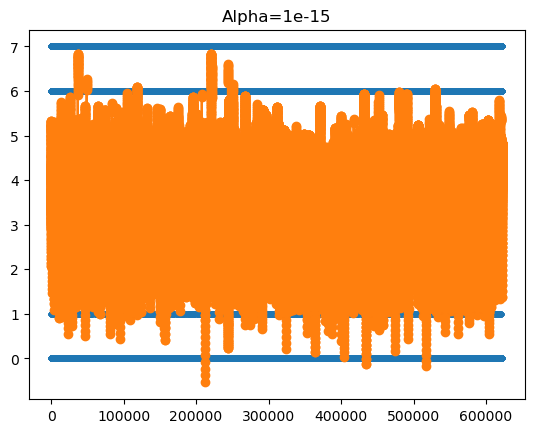

------------------


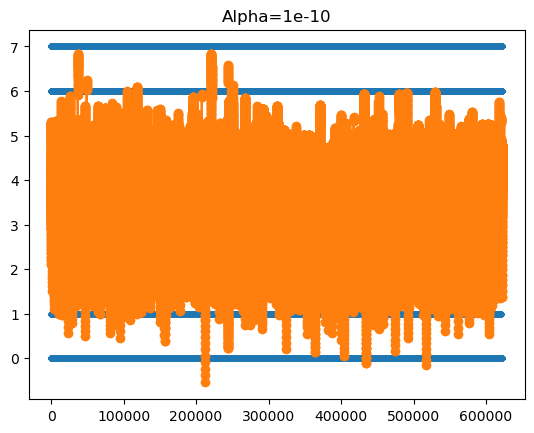

------------------


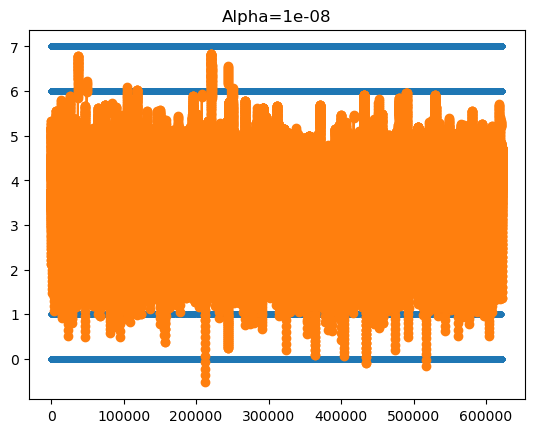

------------------


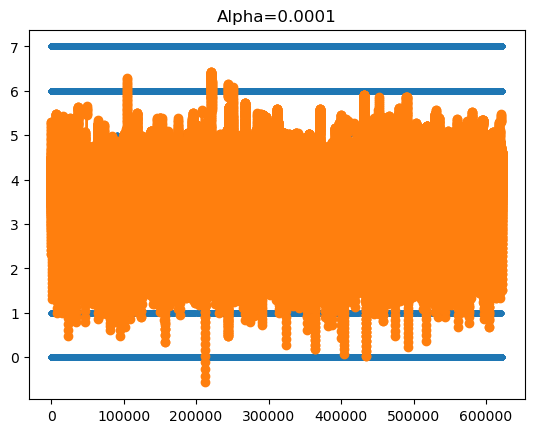

------------------


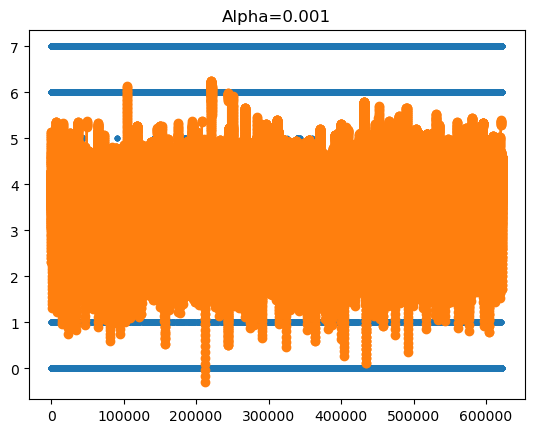

------------------


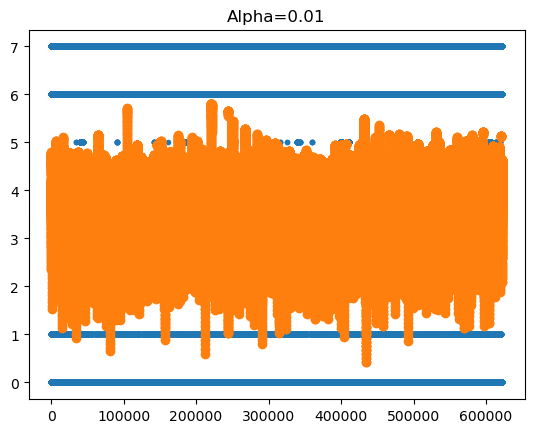

------------------


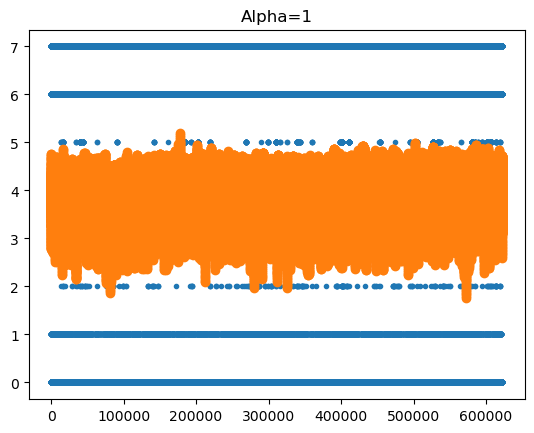

------------------


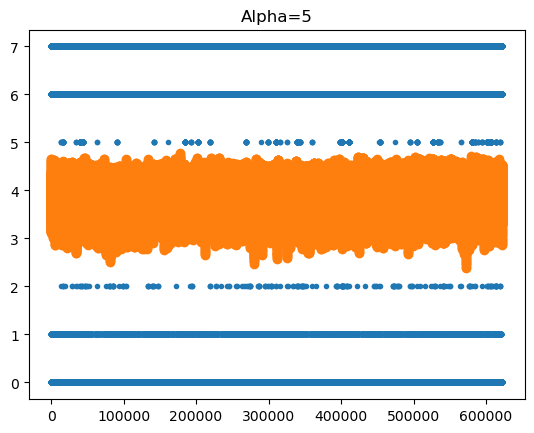

------------------


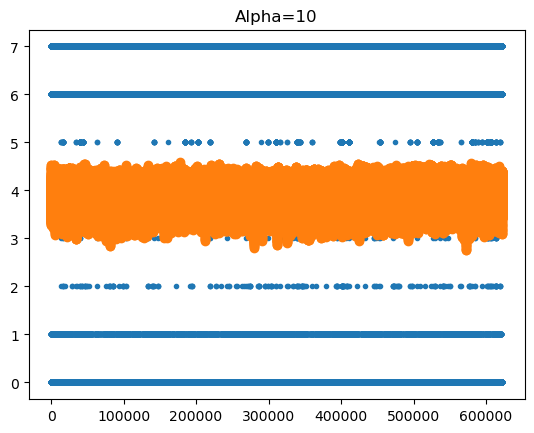

------------------


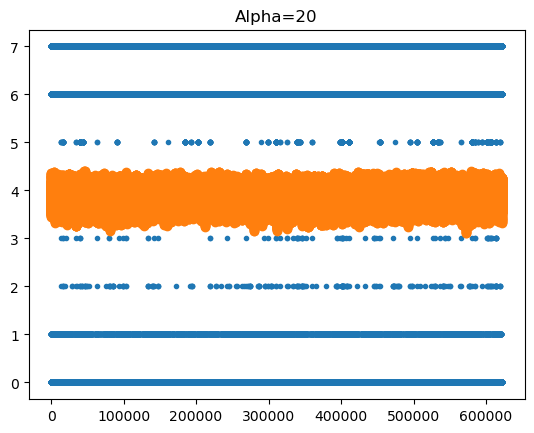

------------------


In [161]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing   import PolynomialFeatures

poly=PolynomialFeatures(degree=3) 
Poly_X= poly.fit_transform(x)

for alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(poly.fit_transform(x_train), y_train)
    plt.title('Alpha=%s' %alpha)
    plt.plot(y_train ,'.', ridge.predict(poly.fit_transform(x_train)),'-o')
    plt.show()
    print('------------------')

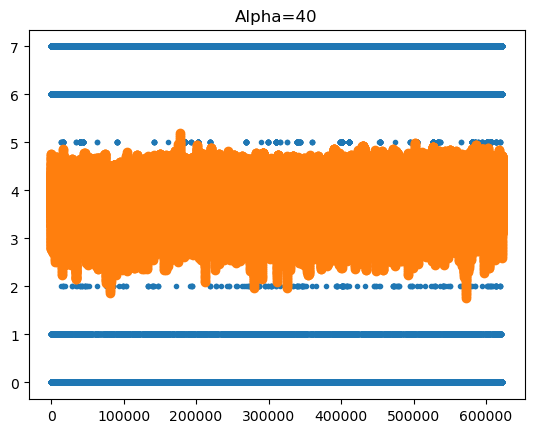

In [163]:
ridge = Ridge(alpha = 1, normalize=True)
ridge.fit(poly.fit_transform(x_train), y_train)
plt.title('Alpha=%s' %alpha)
plt.plot(y_train ,'.', ridge.predict(poly.fit_transform(x_train)),'-o')

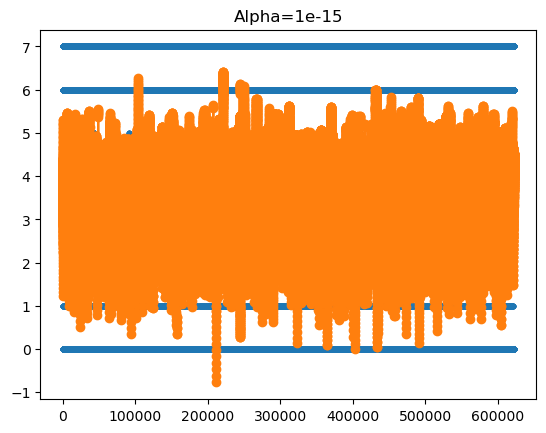

----------------------------------------------------------


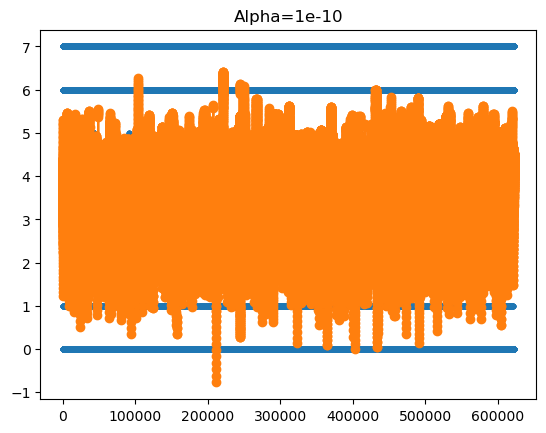

----------------------------------------------------------


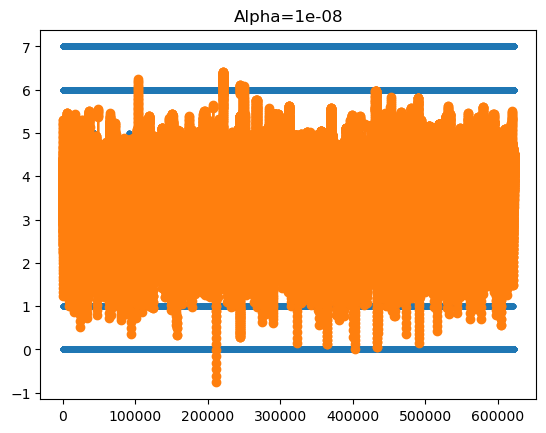

----------------------------------------------------------


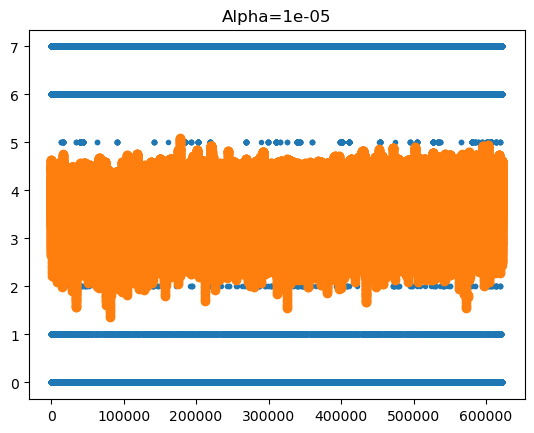

----------------------------------------------------------


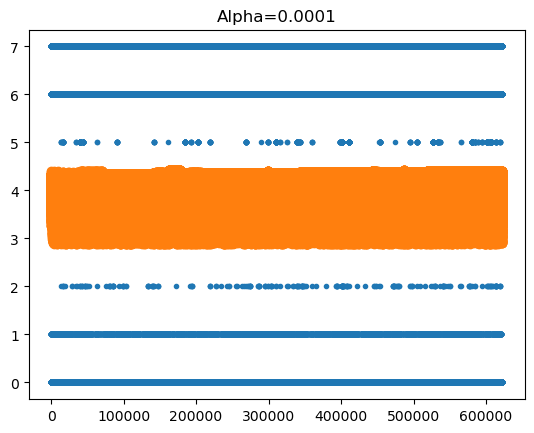

----------------------------------------------------------


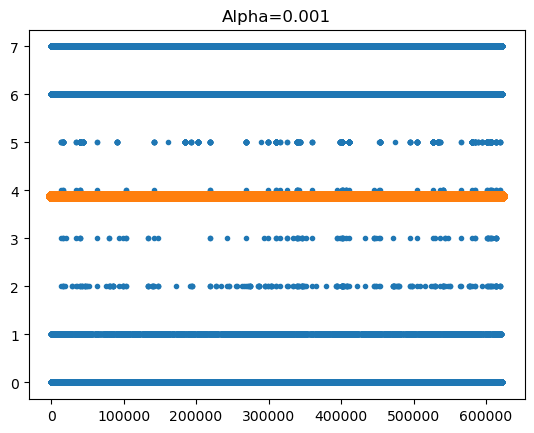

----------------------------------------------------------


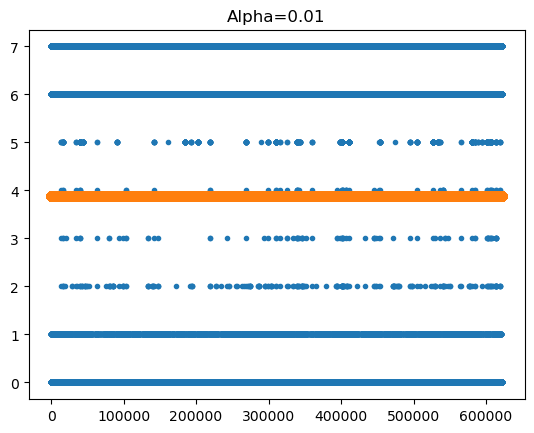

----------------------------------------------------------


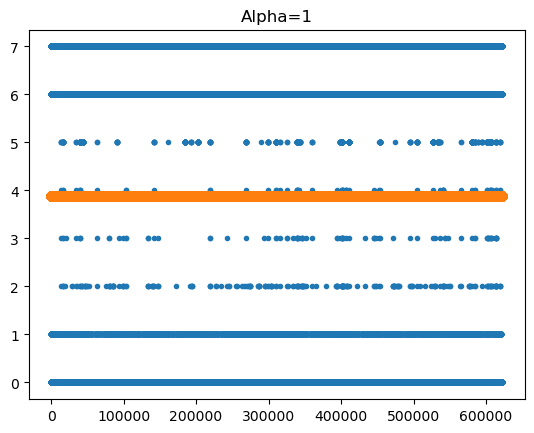

----------------------------------------------------------


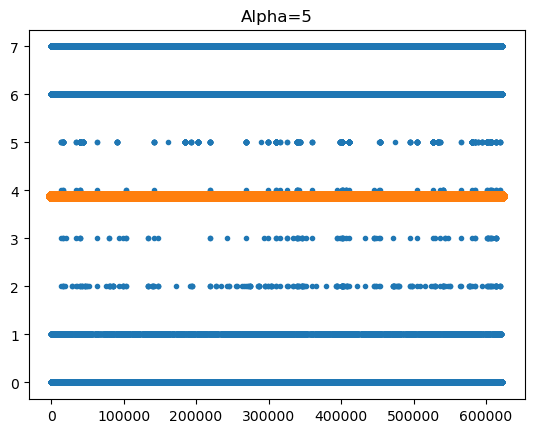

----------------------------------------------------------


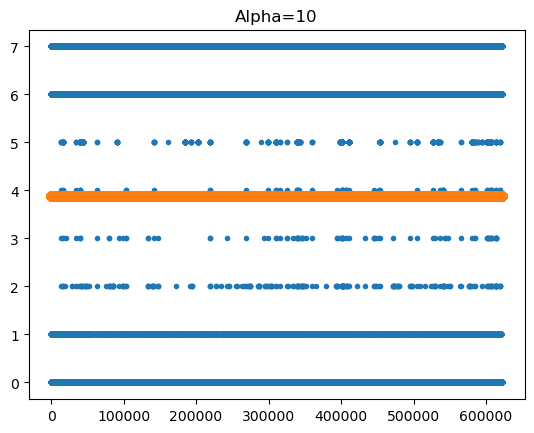

----------------------------------------------------------


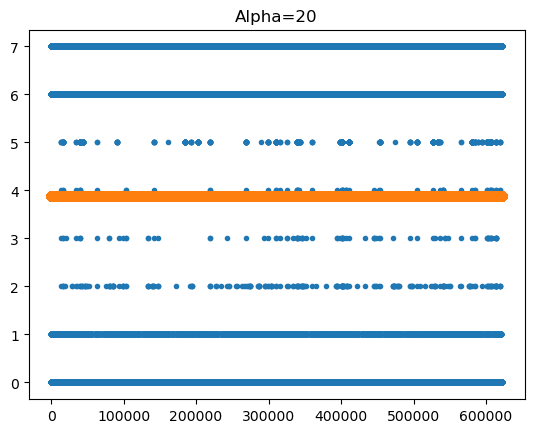

----------------------------------------------------------


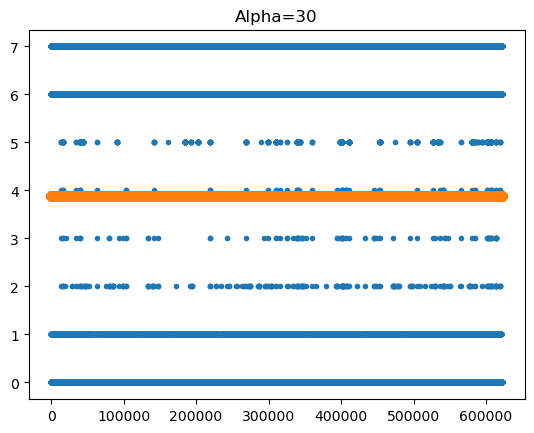

----------------------------------------------------------


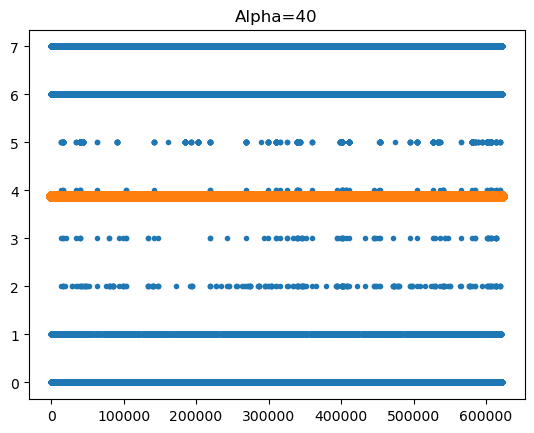

----------------------------------------------------------


,0,1,2,3,4,5,6,7,8,9,...,354,355,356,357,358,359,360,361,362,363
0,0.0,-0.000004,0.118094,-0.244796,0.594360,-0.297136,2.305935,0.141934,-0.054045,-0.182071,...,0.360157,-0.212461,0.808151,-2.562874,0.197688,0.280797,0.181378,0.398814,-3.042965,2.007608
1,0.0,-0.000004,0.117906,-0.244281,0.594003,-0.296998,2.305352,0.141830,-0.053874,-0.181380,...,0.359781,-0.211576,0.807318,-2.562828,0.197696,0.280778,0.181243,0.398852,-3.042732,2.007377
2,0.0,-0.000003,0.100141,-0.193879,0.559422,-0.282458,2.246493,0.136716,-0.037818,-0.114730,...,0.323037,-0.123817,0.726909,-2.558161,0.198394,0.278850,0.167340,0.402517,-3.019221,1.984702
3,0.0,0.000000,0.000000,0.000000,0.000000,-0.063947,0.035437,0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.065077,0.000000,-0.000000,-0.055388,0.000000,-0.000000,-0.895167
4,0.0,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
5,0.0,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
6,0.0,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
7,0.0,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
8,0.0,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
9,0.0,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,...,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000


In [162]:
from sklearn.linear_model import Lasso
coeff_matrix = []
for alpha in [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10,20,30,40]:
    
    lasso = Lasso(alpha = alpha, normalize=True)
    lasso.fit(poly.fit_transform(x_train), y_train)
    coeff_matrix.append(lasso.coef_)
    plt.title('Alpha=%s'%alpha)  # Do YOU REMEMBER THIS SYNTAX  :D
    plt.plot(y_train ,'.', lasso.predict(poly.fit_transform(x_train)),'-o'  )
    plt.show()
    print('----------------------------------------------------------')
pd.DataFrame(coeff_matrix)

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=0, max_depth=2,class_weight)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

SyntaxError: positional argument follows keyword argument (1103568228.py, line 3)

In [165]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13962     0     0     0     0     0 43487     0]
 [  595     0     0     0     0     0  1935     0]
 [  115     0     0     0     0     0   451     0]
 [   45     0     0     0     0     0   150     0]
 [   27     0     0     0     0     0   123     0]
 [  124     0     0     0     0     0   803     0]
 [ 6631     0     0     0     0     0 59734     0]
 [ 5779     0     0     0     0     0 21582     0]]
              precision    recall  f1-score   support

           0       0.51      0.24      0.33     57449
           1       0.00      0.00      0.00      2530
           2       0.00      0.00      0.00       566
           3       0.00      0.00      0.00       195
           4       0.00      0.00      0.00       150
           5       0.00      0.00      0.00       927
           6       0.47      0.90      0.61     66365
           7       0.00      0.00      0.00     27361

    accuracy                           0.47    155543
   macro avg       0.12      0.14      0.12    15

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0,class_weight)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)*100

In [167]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13365     0     0     0     0     0 44084     0]
 [  572     0     0     0     0     0  1958     0]
 [  105     0     0     0     0     0   461     0]
 [   45     0     0     0     0     0   150     0]
 [   26     0     0     0     0     0   124     0]
 [  120     0     0     0     0     0   807     0]
 [ 6169     0     0     0     0     0 60196     0]
 [ 5546     0     0     0     0     0 21815     0]]
              precision    recall  f1-score   support

           0       0.52      0.23      0.32     57449
           1       0.00      0.00      0.00      2530
           2       0.00      0.00      0.00       566
           3       0.00      0.00      0.00       195
           4       0.00      0.00      0.00       150
           5       0.00      0.00      0.00       927
           6       0.46      0.91      0.61     66365
           7       0.00      0.00      0.00     27361

    accuracy                           0.47    155543
   macro avg       0.12      0.14      0.12    15